# **Construcción de algunas métricas a partir del frente de onda, de la función de respuesta al impulso incoherente y de la función de tranferencia óptica para un sistema óptico aberrado**

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
from PIL import Image as im

%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

In [ ]:
def rect1D(x): # FUNCIÓN RECTANGULO EN 1D
  out = np.zeros(len(x))
  for cont in range(0,len(x)):
      out[cont]=int(np.abs(x[cont])<=1/2)
  return out

def rect2D(x): # FUNCION RECTANGULO EN 2D
  out = np.zeros((len(x),len(x)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(x)):
      out[cont,cont2]=int(np.abs(x[cont,cont2])<=1/2)
  return out

def circ(x,y,d): # FUNCION CÍRCULO
  out = np.zeros((len(x),len(y)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(y)):
      out[cont,cont2]=int(np.abs(np.sqrt(x[cont,cont2]**2+y[cont,cont2]**2)/d)<=1)
  return out

def propTF(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # propagation - transfer function approach
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  fx=np.arange(-1/(dx*2),1/(dx*2),1/L)  
  FX, FY = np.meshgrid(fx, fx);
  H=np.exp(-1j*np.pi*lam*z*(FX**2+FY**2))
  H= np.fft.fftshift(H)
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propIR(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - IMPULSE RESPONSE APPROACH
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  h=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X**2+Y**2))
  H= np.fft.fft2(np.fft.fftshift(h))*dx**2
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propFF(u1,L1,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - FRAUNHOFER PATTERN
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  # L2 - Oobservation plane side length
  N=len(u1[0,:]) 
  dx1=L1/N
  k=2*np.pi/lam
  L2=lam*z/dx1
  dx2=lam*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)  
  X2, Y2 = np.meshgrid(x2, x2);
  c=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X2**2+Y2**2))
  u2=c*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return u2, L2

def zernike_pol0(r,theta):
    return np.ones((500,500))
def zernike_pol1(r,theta):
    return r*np.sin(theta)
def zernike_pol2(r,theta):
    return r*np.cos(theta)
def zernike_pol3(r,theta):
    return r**2*np.sin(2*theta)
def zernike_pol4(r,theta):
    return 2*r**2-1
def zernike_pol5(r,theta):
    return r**2*np.cos(2*theta)
def zernike_pol6(r,theta):
    return r**3*np.sin(3*theta)
def zernike_pol7(r,theta):
    return (3*r**3-2*r)*np.sin(theta)
def zernike_pol8(r,theta):
    return (3*r**3-2*r)*np.cos(theta)
def zernike_pol9(r,theta):
    return r**3*np.cos(3*theta)
def zernike_pol10(r,theta):
    return r**4*np.sin(4*theta)
def zernike_pol11(r,theta):
    return (4*r**4-3*r**2)*np.sin(2*theta)
def zernike_pol12(r,theta):
    return 6*r**4-6*r**2+1
def zernike_pol13(r,theta):
    return (4*r**4-3*r**2)*np.cos(2*theta)
def zernike_pol14(r,theta):
    return r**4*np.cos(4*theta)
def zernike_pol15(r,theta):
    return r**5*np.sin(5*theta)
def zernike_pol16(r,theta):
    return (5*r**5-4*r**3)*np.sin(3*theta)
def zernike_pol17(r,theta):
    return (10*r**5-12*r**3+3*r)*np.sin(theta)
def zernike_pol18(r,theta):
    return (10*r**5-12*r**3+3*r)*np.cos(theta)
def zernike_pol19(r,theta):
    return (5*r**5-4*r**3)*np.cos(3*theta)
def zernike_pol20(r,theta):
    return r**5*np.cos(5*theta)
def zernike_pol21(r,theta):
    return r**6*np.sin(6*theta)


def FWHM(X,Y):
    half_max = np.max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx] #return the difference (full width)


## Métricas del frente de onda para un sistema aberrado



El valor de la varianza (en um) es =0.0370 
El valor del rms (en um) es =1.2601 
El valor de la distancia pico-valle (en um) es =2.6138 


<function matplotlib.pyplot.plot>

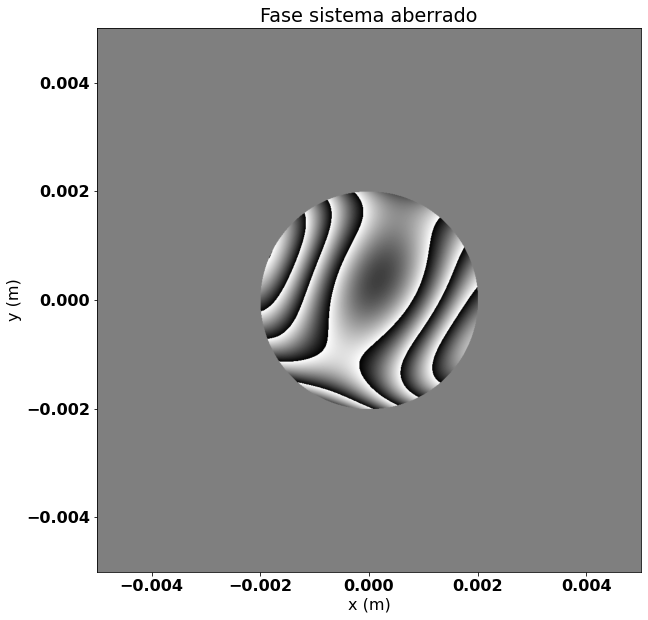

In [ ]:
L=10e-3
N=1024
dx=L/N
x=np.arange(-L/2,L/2,dx)
X, Y=np.meshgrid(x,x);

r=2e-3
lam=0.555e-6
k=2*np.pi/lam
zpex=0.2
rho=((X**2+Y**2)**(0.5))/r
thet=np.arctan2(Y/r,X/r)

############################################### Sistema Aberrado ##############################################

c3=0.8
c4=0.4350
c5=0.8
c6=-0.0153
c7=-0.2263
c8=0.06
c9=-0.08
c10=-0.0253
c11=-0.0688
c12=-0.21
c13=0.045
c14=-0.076

Wxy=c3*zernike_pol3(rho,thet)+c4*zernike_pol4(rho,thet)+c5*zernike_pol5(rho,thet)+c6*zernike_pol6(rho,thet)+c7*zernike_pol7(rho,thet)+\
c8*zernike_pol8(rho,thet)+c9*zernike_pol9(rho,thet)+ c10*zernike_pol10(rho,thet)+c11*zernike_pol11(rho,thet)+\
c12*zernike_pol12(rho,thet)+c13*zernike_pol13(rho,thet)+c14*zernike_pol14(rho,thet)

Wxy=Wxy*1e-6

Pup=circ(X,Y,r)*np.exp((1j*k*Wxy)) 

########## métricas: ####################
vari=np.var(circ(X,Y,r)*Wxy*1e6)
print('El valor de la varianza (en um) es =%.4f ' %vari)

c=np.array([0.8,0.4350,0.8,-0.0153,-0.2263,0.06,-0.08,-0.0253,-0.0688,-0.21,0.045,-0.076])
RMS=np.sqrt(np.sum(c**2))
print('El valor del rms (en um) es =%.4f ' %RMS)


PV=np.max(circ(X,Y,r)*Wxy*1e6)-np.min(circ(X,Y,r)*Wxy*1e6)
print('El valor de la distancia pico-valle (en um) es =%.4f ' %PV)

##########################################

# GRAFICA

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)

plt.imshow(circ(X,Y,r)*np.angle(np.exp((1j*k*Wxy))), cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Fase sistema aberrado')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS
plt.plot

## Métricas obtenidas a partir de la psf

El pico de autocorrelación del sistema L-D es = 0.0740 
La entropia es = 6.0379 
El pico de autocorrelación del sistema aberrado es = 0.0016 
La entropia del sistema aberrado es = 151.0567 
La razón de Strehl es = 0.0070 
La razón de Strehl modificada (usando los picos) es  = 0.0453 


(-0.0017049600000000004, 0.0017049600000000004)

<Figure size 1296x720 with 0 Axes>

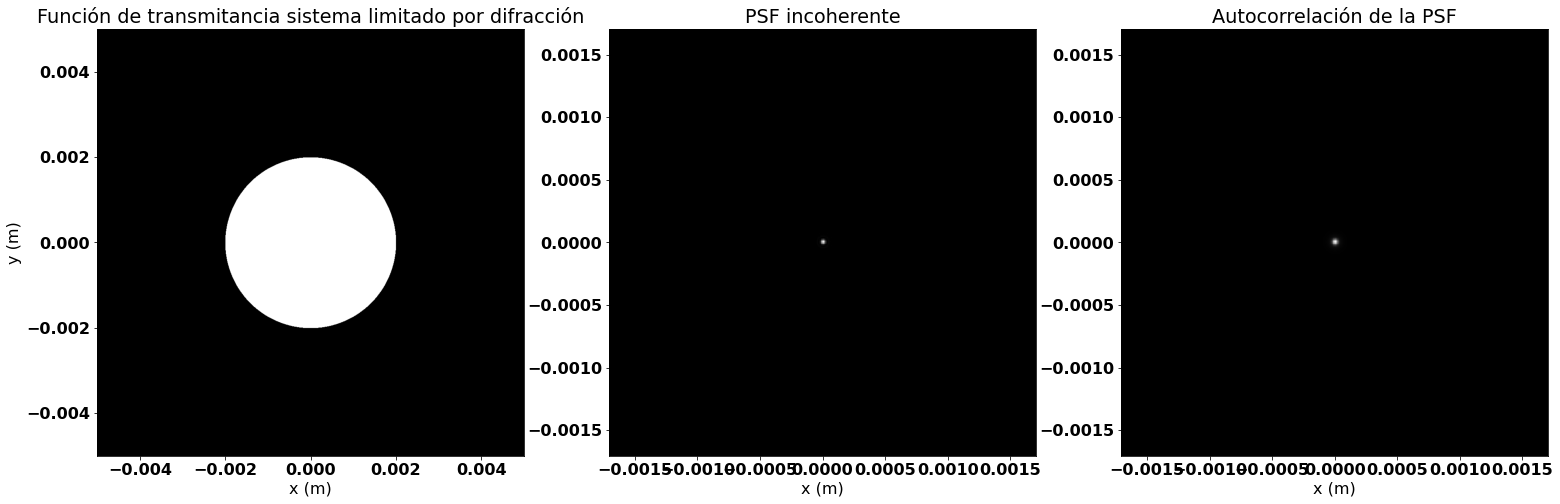

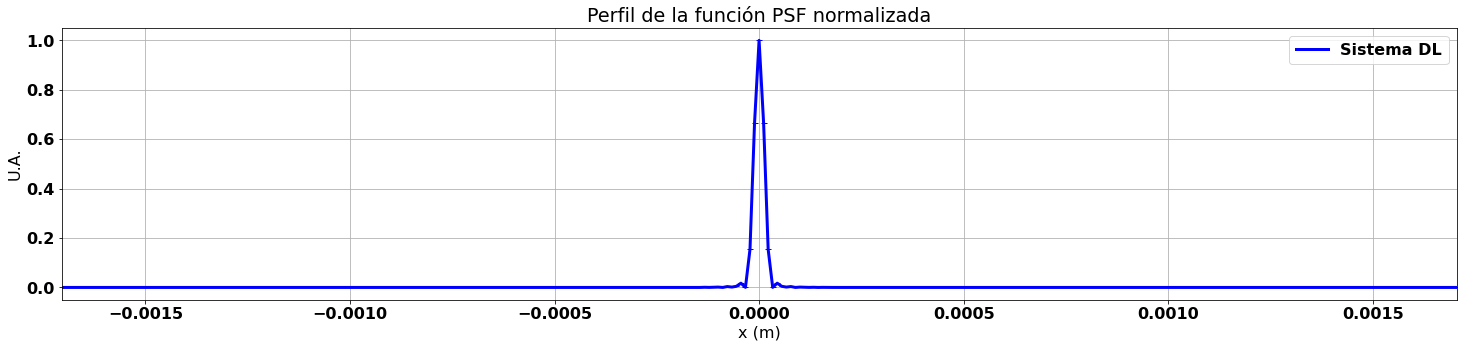

<Figure size 1296x720 with 0 Axes>

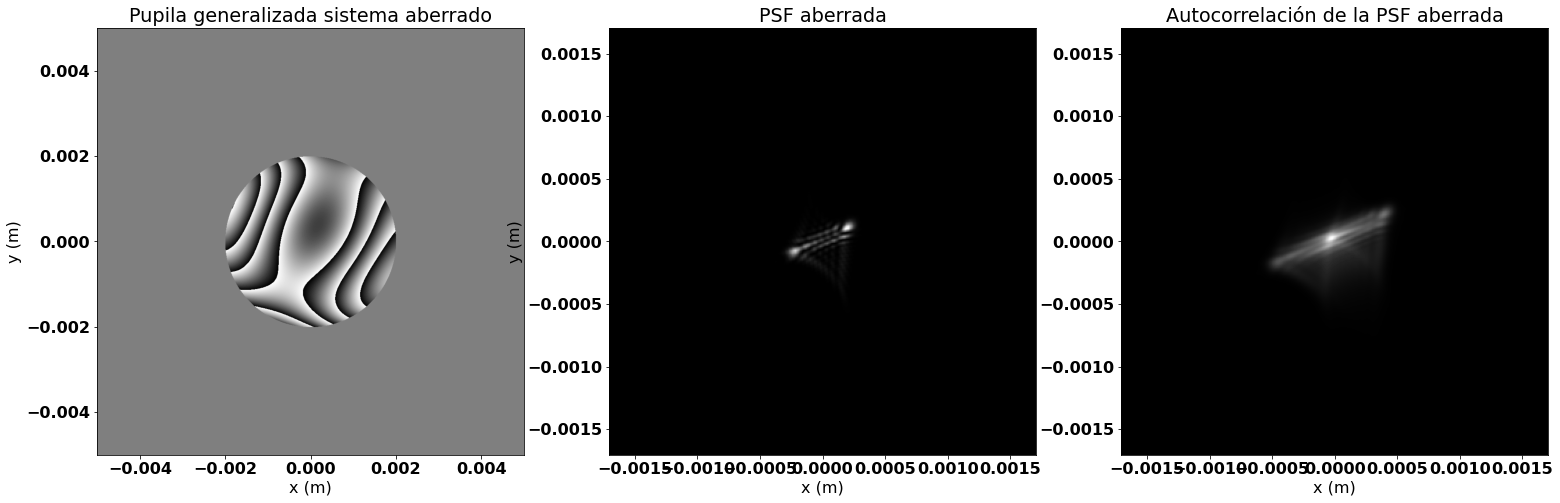

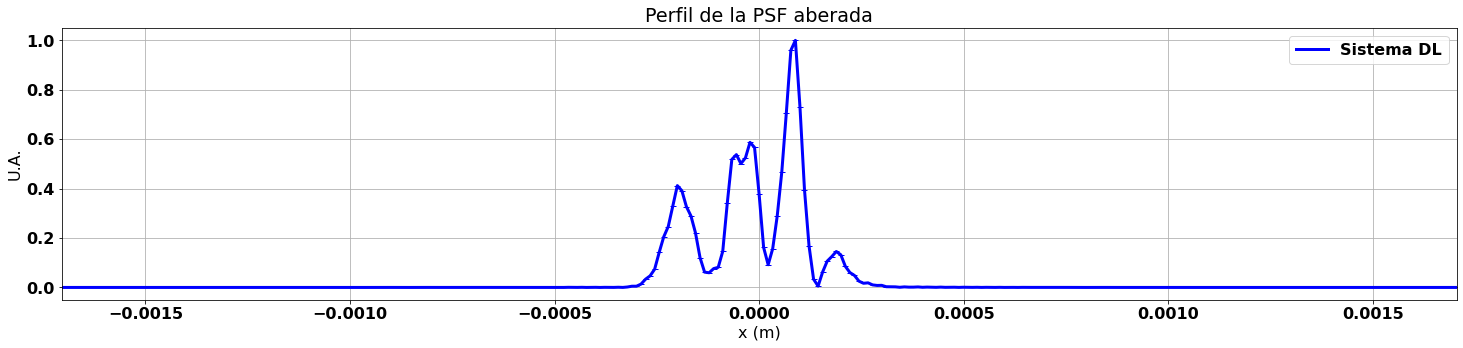

In [ ]:
L=10e-3
N=1024
dx=L/N
x=np.arange(-L/2,L/2,dx)
X, Y=np.meshgrid(x,x);

r=2e-3
lam=0.555e-6
k=2*np.pi/lam
zpex=0.2
rho=((X**2+Y**2)**(0.5))/r
thet=np.arctan2(Y/r,X/r)

###################################################################### Sistema limitado solo por difracción

eye=circ(X,Y,r) # transmitancia de un ojo
psfoj, L2=propFF(eye,L,lam,zpex)                      # PSF coherente
dx2=L2/N
ipsfoj=np.abs(psfoj)**2                            # PSF incoherente
M_DL=np.max(np.max(ipsfoj))
psf_perfil=ipsfoj[round(N/2),:]
x2=np.arange(-L2/2,L2/2,dx2)
############################### MÉTRICAS ##########

# Pico de la autocorrelación
fc=np.fft.fft2(np.fft.fftshift(ipsfoj))*dx2**2
fr=np.fft.fft2(np.fft.fftshift(ipsfoj))
c_PSF=np.fft.ifftshift(np.fft.ifft2(fc*fr))
Pico_c=np.max(abs(c_PSF))

print('El pico de autocorrelación del sistema L-D es = %.4f ' %Pico_c)

# Entropía

HH=-np.sum((ipsfoj/M_DL)*np.log10((ipsfoj/M_DL)))
print('La entropia es = %.4f ' %HH)

#######################################################


# GRAFICACIÓN INTENSIDADES SISTEMA LIMITADO POR DIFRACCIÓN

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(1, 3)

# imagen original

plt.subplot(1,3,1)
plt.imshow(eye, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Función de transmitancia sistema limitado por difracción')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsfoj, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('PSF incoherente')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(abs(c_PSF), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('Autocorrelación de la PSF')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(x2,psf_perfil/M_DL,lw=3,marker='_',label = 'Sistema DL',color='blue')
plt.legend(loc=1)
plt.title('Perfil de la función PSF normalizada')
plt.ylabel('U.A.')
plt.xlabel('x (m)')
plt.grid()
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen


############################################### Sistema Aberrado ##############################################

c3=0.8
c4=0.4350
c5=0.8
c6=-0.0153
c7=-0.2263
c8=0.06
c9=-0.08
c10=-0.0253
c11=-0.0688
c12=-0.21
c13=0.045
c14=-0.076

Wxy=c3*zernike_pol3(rho,thet)+c4*zernike_pol4(rho,thet)+c5*zernike_pol5(rho,thet)+c6*zernike_pol6(rho,thet)+c7*zernike_pol7(rho,thet)+\
c8*zernike_pol8(rho,thet)+c9*zernike_pol9(rho,thet)+ c10*zernike_pol10(rho,thet)+c11*zernike_pol11(rho,thet)+\
c12*zernike_pol12(rho,thet)+c13*zernike_pol13(rho,thet)+c14*zernike_pol14(rho,thet)

#Wxy=c4*zernike_pol4(rho,thet)*1e-6
Wxy=Wxy*1e-6

Pup=circ(X,Y,r)*np.exp((1j*k*Wxy))               # *uobj
psf_Ab, L2=propFF(Pup,L,lam,zpex)                      # PSF coherente
dx2=L2/N
ipsf_Ab=np.abs(psf_Ab)**2                            # PSF incoherente
M_Ab=np.max(np.max(ipsf_Ab))
psf_perfil_Ab=ipsf_Ab[round(N/2),:]

########## métricas: ####################

############################### MÉTRICAS ##########################################

# Pico de la autocorrelación
fc=np.fft.fft2(np.fft.fftshift(ipsf_Ab))*dx2**2
fr=np.fft.fft2(np.fft.fftshift(ipsf_Ab))
c_PSFAb=np.fft.ifftshift(np.fft.ifft2(fc*fr))
Pico_Abc=np.max(abs(c_PSFAb))

print('El pico de autocorrelación del sistema aberrado es = %.4f ' %Pico_Abc)

# Entropía

HH=-np.sum((ipsf_Ab/M_Ab)*np.log10((ipsf_Ab/M_Ab)))
print('La entropia del sistema aberrado es = %.4f ' %HH)

SR=ipsf_Ab[int(N/2),int(N/2)]/ipsfoj[int(N/2),int(N/2)]
print('La razón de Strehl es = %.4f ' %SR)

SR_peak=M_Ab/M_DL
print('La razón de Strehl modificada (usando los picos) es  = %.4f ' %SR_peak)
###################################################################################

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(1, 3)

# imagen original

plt.subplot(1,3,1)
plt.imshow(circ(X,Y,r)*np.angle(Pup), cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Pupila generalizada sistema aberrado')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsf_Ab, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('PSF aberrada')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(abs(c_PSFAb), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('Autocorrelación de la PSF aberrada')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(x2,psf_perfil_Ab/np.max(psf_perfil_Ab),lw=3,marker='_',label = 'Sistema DL',color='blue')
plt.legend(loc=1)
plt.title('Perfil de la PSF aberada')
plt.ylabel('U.A.')
plt.xlabel('x (m)')
plt.grid()
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen

## Métricas obtenidas a partir de la OTF

La frecuencia de corte incoherente es 36.04 ln/mm
El área bajo la MTF es 15337.59
El HWHM de la MTF es 14.56 ln/mm
El área bajo la MTF aberrada es 2561.23
El HWHM de la MTF aberrada es 1.01 ln/mm
La razón de Strehl con la MTF  =0.1646 
La razón de Strehl con la OTF =0.0070 
La razón de Strehl con la OTF/MTF =0.0070 


(0.0, 1.1)

<Figure size 1296x720 with 0 Axes>

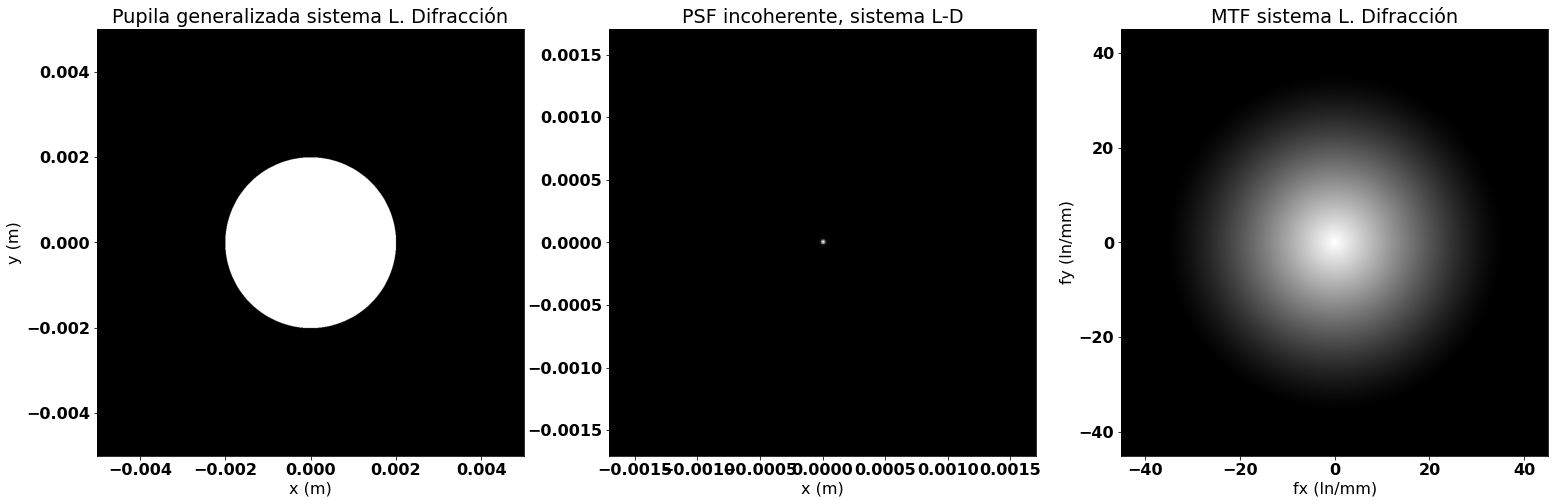

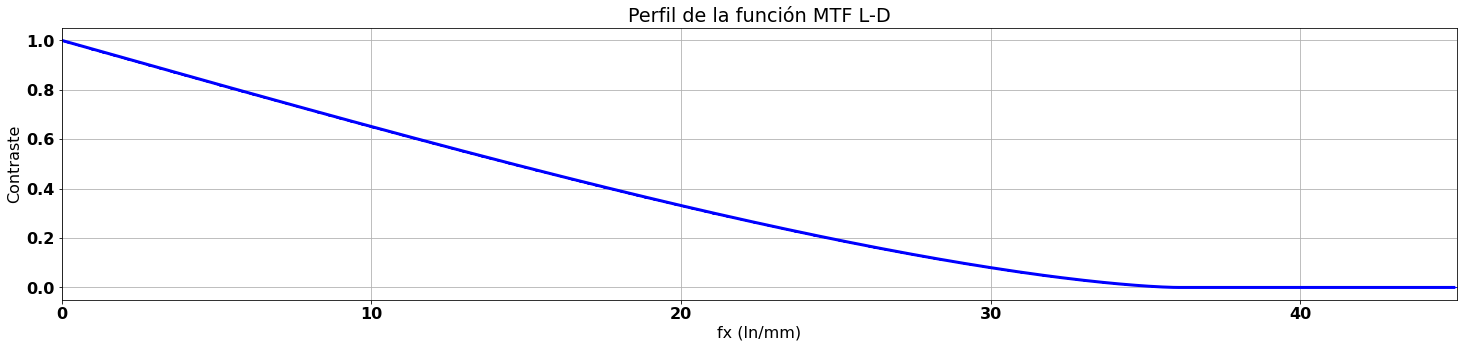

<Figure size 1296x720 with 0 Axes>

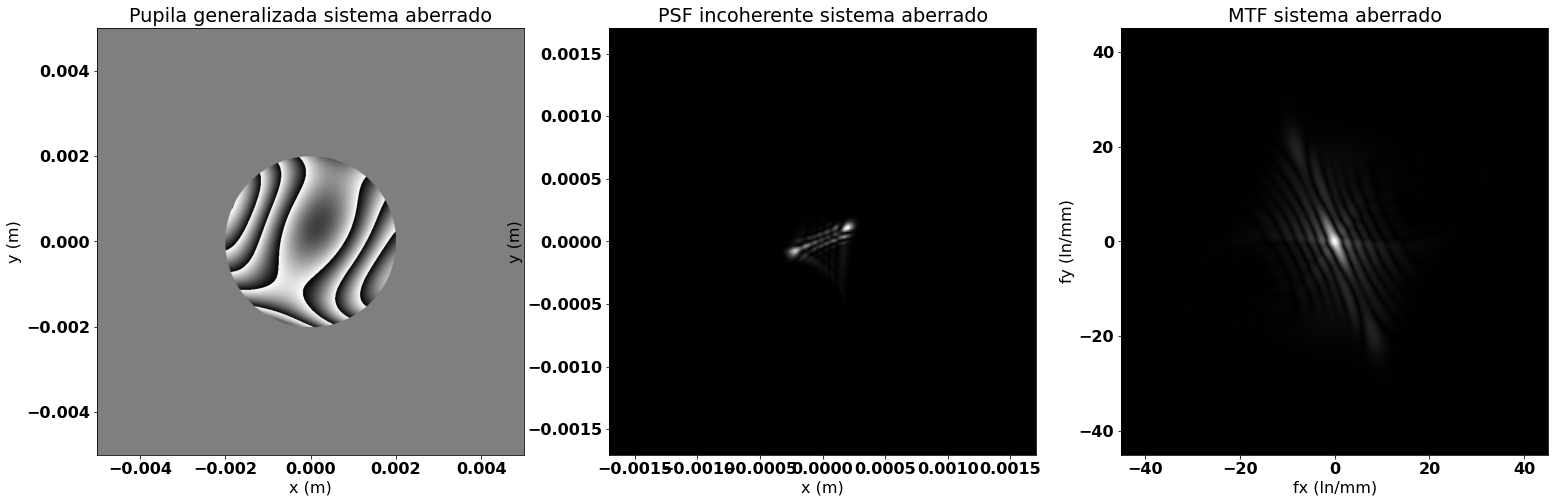

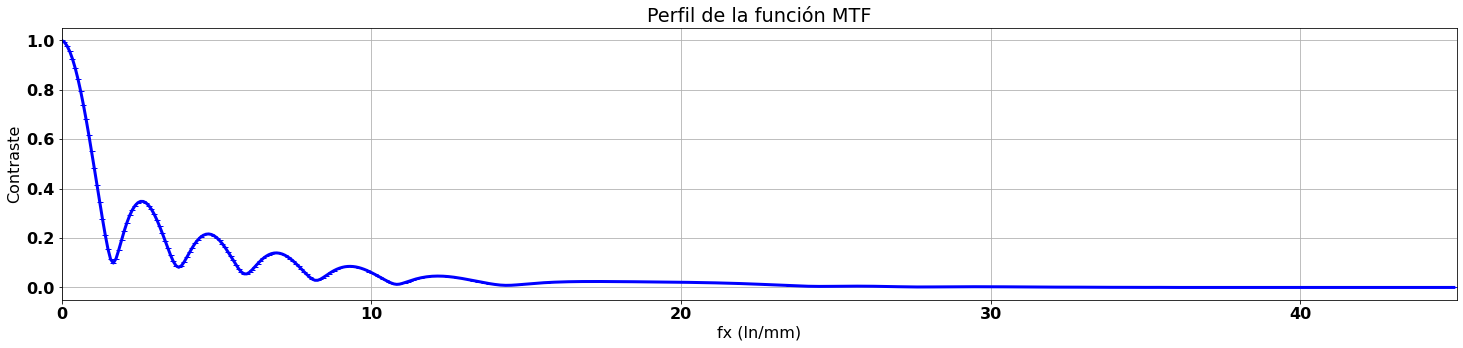

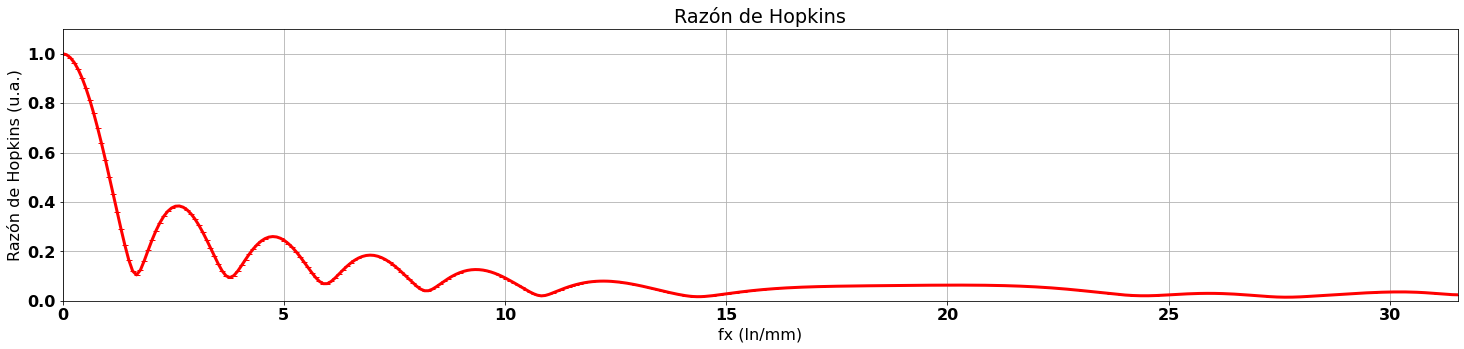

In [ ]:
L=10e-3
N=1024
dx=L/N
x=np.arange(-L/2,L/2,dx)
X, Y=np.meshgrid(x,x);

r=2e-3
lam=0.555e-6
k=2*np.pi/lam
zpex=0.2
rho=((X**2+Y**2)**(0.5))/r
thet=np.arctan2(Y/r,X/r)

###################################################################### Sistema limitado solo por difracción

eye=circ(X,Y,r) # transmitancia de un ojo
psfoj, L2=propFF(eye,L,lam,zpex)                      # PSF coherente
dx2=L2/N
ipsfoj=np.abs(psfoj)**2                            # PSF incoherente
OTF_DL= np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipsfoj)))*dx2**2  # Función de transferencia óptica
OTF_DL= OTF_DL/(np.max(np.max(np.abs(OTF_DL))))
MTF_DL=abs(OTF_DL)                                   # Función de transferencia de la modulación
mtf_perfil=MTF_DL[round(N/2),:]
fx=np.arange(-1/(2*dx2),1/(2*dx2),1/L2) 

############################### MÉTRICAS ##########

# Frecuencia de corte incoherente
F_cut=(2e-3)*r/(lam*zpex)
print('La frecuencia de corte incoherente es %.2f ln/mm' %F_cut)

# Area bajo la MTF
A_c_LD=np.sum(mtf_perfil[int(N/2):N])*(1/L2)
print('El área bajo la MTF es %.2f' %A_c_LD)

# FWHM y HWHM

Fwhm=FWHM(fx,mtf_perfil)
print('El HWHM de la MTF es %.2f ln/mm' %(Fwhm*1e-3/2))

#######################################################


# GRAFICACIÓN INTENSIDADES SISTEMA LIMITADO POR DIFRACCIÓN

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(1, 3)

# imagen original

plt.subplot(1,3,1)
plt.imshow(eye, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Pupila generalizada sistema L. Difracción')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsfoj, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('PSF incoherente, sistema L-D')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(MTF_DL, cmap='gray',extent=[-(1e-3)/(2*dx2),(1e-3)/(2*dx2),-(1e-3)/(2*dx2),(1e-3)/(2*dx2)],origin='lower')
plt.title('MTF sistema L. Difracción')
plt.ylabel('fy (ln/mm)')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(1e-3*fx,mtf_perfil,lw=3,marker='_',color='blue')
plt.title('Perfil de la función MTF L-D')
plt.ylabel('Contraste')
plt.xlabel('fx (ln/mm)')
plt.grid()
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(0,mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen

############################################### Sistema Aberrado ##############################################

c3=0.8
c4=0.4350
c5=0.8
c6=-0.0153
c7=-0.2263
c8=0.06
c9=-0.08
c10=-0.0253
c11=-0.0688
c12=-0.21
c13=0.045
c14=-0.076

Wxy=c3*zernike_pol3(rho,thet)+c4*zernike_pol4(rho,thet)+c5*zernike_pol5(rho,thet)+c6*zernike_pol6(rho,thet)+c7*zernike_pol7(rho,thet)+\
c8*zernike_pol8(rho,thet)+c9*zernike_pol9(rho,thet)+ c10*zernike_pol10(rho,thet)+c11*zernike_pol11(rho,thet)+\
c12*zernike_pol12(rho,thet)+c13*zernike_pol13(rho,thet)+c14*zernike_pol14(rho,thet)

#Wxy=c4*zernike_pol4(rho,thet)*1e-6
Wxy=Wxy*1e-6

Pup=circ(X,Y,r)*np.exp((1j*k*Wxy))               # *uobj
psf_Ab, L2=propFF(Pup,L,lam,zpex)                      # PSF coherente
dx2=L2/N
ipsf_Ab=np.abs(psf_Ab)**2                            # PSF incoherente
OTF_Ab= np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipsf_Ab)))*dx2**2  # Función de transferencia óptica
OTF_Ab= OTF_Ab/(np.max(np.max(np.abs(OTF_Ab))))
MTF_Ab=abs(OTF_Ab)                                   # Función de transferencia de la modulació
mtf_perfil_Ab=MTF_Ab[round(N/2),:]
fx=np.arange(-1/(2*dx2),1/(2*dx2),1/L2)


############################### MÉTRICAS ##########################################

# Razón de Hopkins
HR=mtf_perfil_Ab/mtf_perfil

# Area bajo la MTF
A_c_LD=np.sum(mtf_perfil_Ab[int(N/2):N])*(1/L2)
print('El área bajo la MTF aberrada es %.2f' %A_c_LD)

# FWHM y HWHM
Fwhm=FWHM(fx,mtf_perfil_Ab)
print('El HWHM de la MTF aberrada es %.2f ln/mm' %(Fwhm*1e-3/2))

SR_MTF=(np.sum(mtf_perfil_Ab)/np.sum(mtf_perfil))
print('La razón de Strehl con la MTF  =%.4f ' %SR_MTF)

SR_OTF=np.abs(np.sum(OTF_Ab)/np.sum(OTF_DL))
print('La razón de Strehl con la OTF =%.4f ' %SR_OTF)

SR_MOTF=np.abs(np.sum(OTF_Ab)/np.sum(MTF_DL))
print('La razón de Strehl con la OTF/MTF =%.4f ' %SR_MOTF)
###################################################################################

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(1, 3)

# imagen original

plt.subplot(1,3,1)
plt.imshow(circ(X,Y,r)*np.angle(Pup), cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Pupila generalizada sistema aberrado')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L/2,mm*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(ipsf_Ab, cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('PSF incoherente sistema aberrado')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
mm=3 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*L2/2,mm*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(MTF_Ab, cmap='gray',extent=[-(1e-3)/(2*dx2),(1e-3)/(2*dx2),-(1e-3)/(2*dx2),(1e-3)/(2*dx2)],origin='lower')
plt.title('MTF sistema aberrado')
plt.ylabel('fy (ln/mm)')
plt.xlabel('fx (ln/mm)')
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(-mm*0.1*(1e-3)/(2*dx2),mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(1e-3*fx,mtf_perfil_Ab,lw=3,marker='_',color='blue')
plt.title('Perfil de la función MTF')
plt.ylabel('Contraste')
plt.xlabel('fx (ln/mm)')
plt.grid()
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(0,mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(1e-3*fx,HR,lw=3,marker='_',color='red')
plt.title('Razón de Hopkins')
plt.ylabel('Razón de Hopkins (u.a.)')
plt.xlabel('fx (ln/mm)')
plt.grid()
mm=7 ## valor máximo m=10 para el zoom
plt.xlim(0,mm*0.1*(1e-3)/(2*dx2)) ## zoom para ver mejor la imagen
plt.ylim(0,1.1) ## zoom para ver mejor la imagen
